In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import datasets
from scipy.sparse import csc_matrix
from numpy import linalg as LA
import math as m
import scipy.sparse.linalg as spla

# KRYLOV
在數學上，廣義最小殘量方法(一般簡稱GMRES)是一個求解線性方程組 數值解的疊代方法。這個方法利用在Krylov子空間中有著最小殘量的向量來逼近解$Ax=b$ ,假設 $𝐴∈𝑅^{𝑛×𝑛}$ 且 $𝒃∈𝑅^𝑛$

這個問題的m階Krylov子空間是
##$$span\{b,Ab,A^2b....A^mb\}\tag{1-1}$$
在 step m 時, 使用$𝑥_𝑚∈𝐾_𝑚$求$ 𝒙^∗=𝐴^{−1}b$的近似解， 那麼殘差
$‖𝐫_𝐧 ‖_2=‖𝐴𝒙_𝑚−𝑏‖_2$  會是 minimized

向量 $𝐱_𝐦∈𝐾_𝑚$ 可以表示成 
##$$𝐱_𝑚=𝐾_𝑚 𝐜  ,  𝐜∈𝑅^𝑚\tag{1-2}$$
那我們的目標便是$min:‖𝒓_𝒏 ‖_2=‖𝐴𝑿_𝒎−𝒃‖_2$也就是 
##$$min:‖𝒓_𝒏 ‖_2=‖𝐴𝐾_𝑚 𝑪−𝑏‖_2\tag{1-3}$$
目標是在m step 時得到一個近似解$x_m$

<u>詳細內容可以參考 **lec16** P15~P17</u>

In [2]:
def Krylov(A, b , nmax_iter=100, restart=0.0,tol=1e-22):
    flag="未收斂"
    x0=np.ones(A.shape[0])
    r = b - np.asarray(np.dot(A, x0)).reshape(-1)
    m = A.shape[0]
    x = []
    Kry =  np.zeros((m, nmax_iter + 1))
    Kry[:,0]=b
    x.append(r)

    for m in range(nmax_iter):
        AA=A**m
        Kry[:,m]=np.dot(AA,b)                              #請填這裡(1-1)
        
        AK=np.dot(A,Kry[:,:m+1])
        
        
        result =get_c(AK, b)          #(1-3)
        x.append(np.dot(Kry[:,:m+1],result))
        err=error(result,AK,b)
        if err <tol :
            flag="在"+str(m)+"時收斂"
            return x[m],restart,flag
            break

    return x[m] , restart ,flag

In [3]:
def get_c(AK, b):   #請填這裡1-3 
    
    ####寫下你的程式碼 hinit :least square problem 
    
    result,Error,RankX,Singularvalues=np.linalg.lstsq(AK, b)
    return result

In [4]:
def lstA(n):
    X,b = datasets.make_regression(n_samples=n,n_features=n,n_targets=1,noise=10)
    return X,b

In [5]:
def error(w,X,b):
    error = np.linalg.norm(X.dot(w) - b, ord=2) ** 2
    return error

## 檢查你的答案
- 出來的結果必須與np.linalg..lstsq(A)相同

In [6]:
A_mat=np.array([[1,3,4,2],[2,5,6,3],[3,1,2,5],[4,1,5,2]])
b_mat = np.array([3, 2,6,1])

x = Krylov(A_mat,b_mat,100)
print("Krylov:")
print(x)
print("np.linalg.lstsq:")
x,res,__,__=np.linalg.lstsq(A_mat, b_mat)
print(x,res)

Krylov:
(array([-2.76595745, -2.23404255,  1.82978723,  2.57446809]), 0.0, '在11時收斂')
np.linalg.lstsq:
[-2.76595745 -2.23404255  1.82978723  2.57446809] []


<ipython-input-3-04db00ac8a7c>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result,Error,RankX,Singularvalues=np.linalg.lstsq(AK, b)
<ipython-input-6-2e6f4cb5236e>:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x,res,__,__=np.linalg.lstsq(A_mat, b_mat)


## integer Number matrix
這邊我們將隨機產生A,b  $𝐴∈N^{𝑛×𝑛}$ , $𝒃∈N^𝑛 且n\in\{2,3,...7\}$
並使用剛設計的Krylov演算法得到近似解 

In [7]:
for n in range(2,7):
    N=2**n
    A_mat=np.random.randint(5, size=(N, N))
    b_mat=np.random.randint(5, size=N)
    #A_mat,b_mat=lstA(n)
    x = Krylov(A_mat,b_mat,100,tol=1e-16)
    print("Krylov:")
    print(x)
    print("np.linalg.lstsq:")
    x,res,__,__=np.linalg.lstsq(A_mat, b_mat)
    print(x,res)
    print("\n")

Krylov:
(array([-0.30918721,  0.2978923 ,  0.25653488,  0.14256073]), 0.0, '在3時收斂')
np.linalg.lstsq:
[-0.32608696  0.26086957  0.2826087   0.19565217] []


Krylov:
(array([-3.87833522,  0.10032015,  2.4546425 ,  1.33511215, -0.33938101,
       -0.4119531 , -0.89754543,  0.73105658]), 0.0, '在30時收斂')
np.linalg.lstsq:
[-3.87833511  0.10032017  2.45464248  1.33511206 -0.339381   -0.41195304
 -0.89754536  0.73105656] []


Krylov:
(array([ 1.40468127,  2.11611167,  1.1346349 , -2.45977242,  5.13996533,
        0.06949864, -3.6050892 , -1.36968367,  1.77851409, -0.59129023,
       -7.04438202, -0.06441344, -0.63405142,  1.98438253, -2.22790424,
        2.64464683]), 0.0, '在29時收斂')
np.linalg.lstsq:
[ 1.40468151  2.11611179  1.13463461 -2.45977253  5.13996449  0.069498
 -3.60508887 -1.36968383  1.7785141  -0.59129046 -7.0443809  -0.06441298
 -0.63405156  1.98438315 -2.22790416  2.64464643] []


Krylov:
(array([-0.31449259,  0.3574594 , -0.19612063, -0.20649262,  0.28835536,
        0.43886682, 

<ipython-input-3-04db00ac8a7c>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result,Error,RankX,Singularvalues=np.linalg.lstsq(AK, b)
<ipython-input-7-84d35e052cec>:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x,res,__,__=np.linalg.lstsq(A_mat, b_mat)


## Real number matrix
這邊我們將隨機產生A,b  $𝐴∈R^{𝑛×𝑛}$ , $𝒃∈R^𝑛 且n\in\{2,3,...7\}$
並使用剛設計的Krylov演算法得到近似解 

In [8]:
for n in range(2,7):
    N=2**n
    A_mat,b_mat=lstA(N)
    x = Krylov(A_mat,b_mat,100,tol=1e-16)
    print("Krylov:")
    print(x)
    print("np.linalg.lstsq:")
    x,res,__,__=np.linalg.lstsq(A_mat, b_mat)
    print(x,res)
    print("\n")

Krylov:
(array([ -37.15210468,  -55.14580231, -146.40277019,  -72.5749043 ]), 0.0, '在3時收斂')
np.linalg.lstsq:
[ 31.48351523 213.7568063  156.01772787  91.90547871] []


Krylov:
(array([44.13771359, -3.21831457, 48.66972396, 30.05772814, 39.37254377,
       79.88035813, 26.33148083, 34.99585953]), 0.0, '在7時收斂')
np.linalg.lstsq:
[ 24.10383056   0.3023707    1.58414258  11.74508874   4.35595922
 101.57978629  47.8740288   56.30778269] []


Krylov:
(array([-5.92230913, 35.58931587, 52.98409136,  7.1151786 , 13.62152093,
       37.88783416, 36.62946208, 75.2712183 , -5.68505507, 43.60985492,
        5.61293647, 32.33765814, 38.71992916, 83.01261454, -3.36289269,
        2.33675179]), 0.0, '在15時收斂')
np.linalg.lstsq:
[-4.97264297 34.64170365 51.04098236  5.15675546 15.42014551 35.59587438
 39.48411466 73.71898457 -7.32316837 44.42364114  2.33528979 30.19651112
 50.33297371 77.74979409 -4.96191416  5.88261516] []


Krylov:
(array([-5.43506496e-02, -4.81674494e+01,  1.92930241e-05,  8.62467436e+

<ipython-input-3-04db00ac8a7c>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result,Error,RankX,Singularvalues=np.linalg.lstsq(AK, b)
<ipython-input-8-7276b165c33b>:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x,res,__,__=np.linalg.lstsq(A_mat, b_mat)


# Arnoldi 迭代法
使用Krylov演算法 得到的結果可以看出效果似乎不是那麼好，所以GMRES並不是直接使用Krylov, 而是使用Arnoldi 迭代法

Arnoldi iteration:
$$𝐴𝑄_𝑚=𝑄_{𝑚+1} (𝐻_𝑚 ) ̅
$$ $$‖𝐴𝑄_𝑚 𝑦−𝑏‖_2→‖𝑄_{𝑚+1} 𝐻_𝑚 𝒚−𝑏‖_2$$

***以下是我們提供的演算法:***
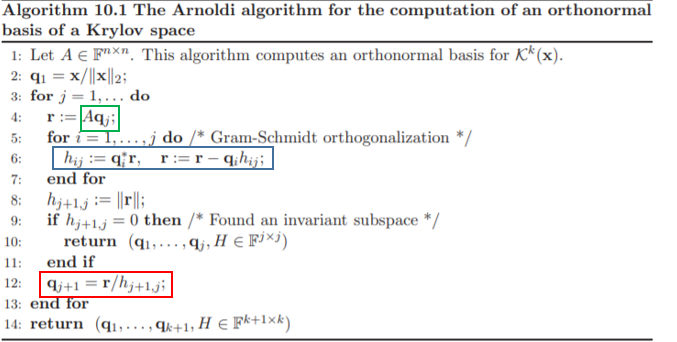
<u>詳細內容可以參考 **lec16** P9~P14</u>以及

reference:http://people.inf.ethz.ch/arbenz/ewp/Lnotes/chapter10.pdf

In [9]:
import numpy as np

def arnoldi_iteration(A, n: int):
    """Computes a basis of the (n + 1)-Krylov subspace of A: the space
    spanned by {b, Ab, ..., A^n b}.

    Arguments
      A: m × m array
      b: initial vector (length m)
      n: dimension of Krylov subspace, must be >= 1
    
    Returns
      Q: m x (n + 1) array, the columns are an orthonormal basis of the
        Krylov subspace.
      h: (n + 1) x n array, A on basis Q. It is upper Hessenberg.  
    """
    m = A.shape[0]
    b=np.ones(m)
    h = np.zeros((n + 1, n))
    Q = np.zeros((m, n + 1))
    q = b / np.linalg.norm(b) 
    Q[:, 0] = q 

    for j in range(n):
        r =np.dot(A,q)                 #請填這裡 綠色框
        for i in range(j + 1):  # Subtract the projections on previous vectors
            h[i, j] = np.dot(Q[:,i],r)      #請填這裡 藍色框  
            r = r-np.dot(h[i,j],Q[:,i])            #請填這裡 藍色框  

        h[j + 1, j] = np.linalg.norm(r)
        eps = 1e-12  # If r is shorter than this threshold it is the zero vector
        if h[j + 1, j] > eps:  
            q =r/h[j+1,j]             #請填這裡 紅色框
            Q[:, j + 1] = q
        else:  # If that happens, stop iterating.
            return Q, h,j
    return Q, h,j

# QR 計算 eigenvalue
這邊我們將使用QR分解的 方式去計算eigenvalue

reference:https://ccjou.wordpress.com/2013/04/02/%E7%89%B9%E6%AE%8A%E7%9F%A9%E9%99%A3-19%EF%BC%9Ahessenberg-%E7%9F%A9%E9%99%A3/
https://ccjou.wordpress.com/2011/06/03/qr-%E5%88%86%E8%A7%A3%E7%9A%84%E6%95%B8%E5%80%BC%E8%A8%88%E7%AE%97%E6%96%B9%E6%B3%95%E6%AF%94%E8%BC%83/

In [10]:
class S:
    
    def __init__(self, i, j, tan = 0):
        self.i = i
        self.j = j
        self.sin = self.__to_sin(tan)
        self.cos = self.__to_cos(tan)
        
    def __to_sin(self, tan):
        return tan / m.sqrt(1.0 + tan * tan)
    
    def __to_cos(self, tan):
        return 1.0 / m.sqrt(1.0 + tan * tan)
    
    def infinity_tan(self):
        self.sin = 1.0
        self.cos = 0.0

def sij_dot_A(s_ij, A): # A should be a numpy matrix
    for idx in range(0, A.shape[1]):
        temp = A[s_ij.j, idx] * s_ij.cos + A[s_ij.i, idx] * s_ij.sin
        A[s_ij.i, idx] = A[s_ij.i, idx] * s_ij.cos - A[s_ij.j, idx] * s_ij.sin
        A[s_ij.j, idx] = temp

def A_dot_transpose_sij(A, s_ij):
    for idx in range(0, A.shape[0]):
        temp = A[idx, s_ij.j] * s_ij.cos + A[idx, s_ij.i] * s_ij.sin
        A[idx, s_ij.i] = A[idx, s_ij.i] * s_ij.cos - A[idx, s_ij.j] * s_ij.sin
        A[idx, s_ij.j] = temp

def next_s(A, i, j, tolerance=1e-10):
    if abs(A[j, j]) < tolerance:
        s = S(i, j)
        s.infinity_tan()
        return s
    else:
        tan = A[i, j] / A[j, j]
        return S(i, j, tan)

def diagonals(A):
    eis = []
    for idx in range(0, A.shape[0]):
        eis.append(A[idx, idx])
        
    return eis

def qr_one_step(A):
    s_list = []
    for j in range(0, A.shape[1]): # multiplications from left, erasing zeros in the j. column 
        for i in range(A.shape[0] - 1, j, -1):
            s_temp = next_s(A, i, j)
            sij_dot_A(s_temp, A)
            s_list.append(s_temp)
    
    for s in s_list: # multiplying from right, the order is good due to append
        A_dot_transpose_sij(A, s)

def qr(A, iter_num = 5, callback = None, shift = False,isprint=True): # shift: True shifting is applied
    
    # helper for calculating the error
    def sum_sq():
        loss = 0.0
        for x in diagonals(A):
            loss += x * x
        return loss
    if(isprint == True):
        print("第幾個iter收斂:")
    ei_sum_0 = sum_sq()
    flag=True
    error=iter_num+10 #區分剛好到499收斂
    for it in range(iter_num):
        
        if shift:
            DeltaA = A[-1, -1] * np.identity(A.shape[0])
            A -= DeltaA
            qr_one_step(A)
            A += DeltaA
        else:
            qr_one_step(A)
        
        # error calculation and administration
        ei_sum_1 = sum_sq()
        error = ei_sum_1 - ei_sum_0
        if((np.abs(error)<1e-3)&(flag==True)):
            flag=False
            if(isprint == True):
                print(it)
            t1=time()
        
        if not (callback is None):
            callback(error)
            
        ei_sum_0 = ei_sum_1
    if(flag==True):#沒收斂
            if(isprint == True):
                print("在iter="+str(iter_num)+"以前不會收斂")
            t1=time()    
    return  t1

In [11]:
history = { "it": [], "err": []} #用來做顯示圖 與紀錄工作
def monitor_error(error):
    history["err"].append(error)
    history["it"].append(len(history["it"]) + 1)
    
def show_graph(title):
    plt.plot(history["it"], history["err"])

    plt.xlabel('iteration')
    plt.ylabel('error')
    plt.title(title)
    plt.show()

def clear_history():
    history["it"].clear()
    history["err"].clear()

# 檢視使用arnoldi_iteration(A)得到的結果 與直接使用A 計算eigenvalue的差異

## 檢查你的答案
- arnoldi_iteration是否有寫錯
- 出來的結果必須與np.linalg.eig(A)相同

In [12]:
A_test=np.array([[1,3,4,2],[2,5,6,3],[3,1,2,5],[4,1,5,2]])
___ , H , k =arnoldi_iteration(A_test, n=150)
print("檢查H使否為Hhesson breg")
print(H[:k+1,:k+1])
mtx=H[:k+1,:k+1]
__=qr(mtx, 300, callback = monitor_error)
print("eigenvalue 值使否相同")
print(np.sort(np.diag(mtx)))
eig,___=np.linalg.eig(A_test)
print(np.sort(eig))

檢查H使否為Hhesson breg
[[12.25       -1.0153194  -1.43211712 -2.25957232]
 [ 2.27760839  1.2560241   0.22979198 -1.75747706]
 [ 0.          2.97529383 -0.60185251 -1.19978254]
 [ 0.          0.          1.32479544 -2.90417159]]
第幾個iter收斂:
23
eigenvalue 值使否相同
[-2.766452   -0.85252191  1.66741906 11.95155485]
[-2.766452   -0.85252191  1.66741906 11.95155485]


## 檢視使用arnoldi_iteration(A)直接使用A 計算eigenvalue的各項差異
- 收斂所需的strp數
- 從計算A or arnoldi_iteration(A) 到 QR 收斂所需時間
- 1迭代到800 的error(與前一個step 的 eigenvalue 的差距) 狀況

In [13]:
def QRcompare(n=2):
    N = 2**n
    print("%d*%d的矩陣\n"%(N,N))
    A,b=lstA(N)
    print("QR without Hessenber")
    mtx=A
    t0=time()
    time1=qr(mtx, 800, callback = monitor_error)
    print("花費時間:"+str(time1-t0))
    show_graph("QR without Hessenberg")
    clear_history()
    print(np.sort(np.diag(mtx)))
    print("\n")
    t0=time()
    ___ , H , k =arnoldi_iteration(A, n=150)
    mtx=H[:k+1,:k+1]
    time2=qr(mtx, 800, callback = monitor_error)
    print("花費時間:"+str(time2-t0))
    show_graph("QR with Hessenberg")
    clear_history()
    print(np.sort(np.diag(mtx)))
    print("\n使用np.linalg.eig計算出來的eigenvalue:")
    eig,___=np.linalg.eig(A)
    print(np.sort(eig))
    print("####################################################################################3")

4*4的矩陣

QR without Hessenber
第幾個iter收斂:
194
花費時間:0.027647733688354492


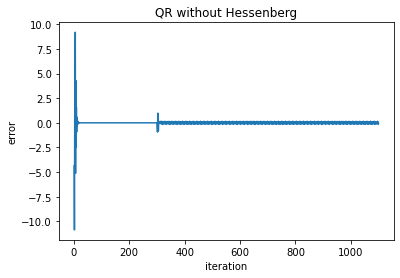

[-1.22530973 -0.67704154 -0.56714903 -0.36886398]


第幾個iter收斂:
246
花費時間:0.030926942825317383


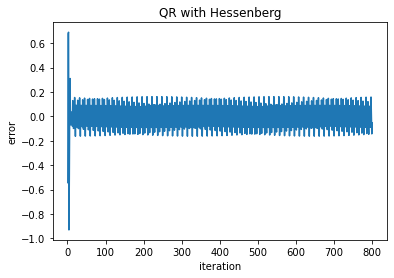

[-1.22530973 -0.64903424 -0.59515633 -0.36886398]

使用np.linalg.eig計算出來的eigenvalue:
[-1.22530973+0.j         -0.62209529-1.63655171j -0.62209529+1.63655171j
 -0.36886398+0.j        ]
####################################################################################3
8*8的矩陣

QR without Hessenber
第幾個iter收斂:
145
花費時間:0.1376650333404541


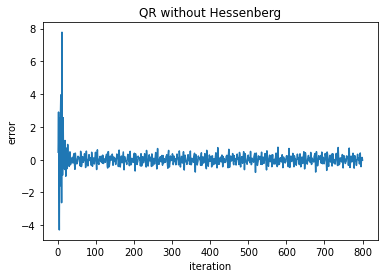

[-3.38028749 -1.56835719 -0.99728397 -0.16886385  0.42503243  0.56218115
  2.44027433  2.52069616]


第幾個iter收斂:
58
花費時間:0.0578157901763916


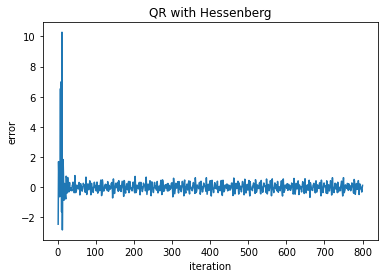

[-3.38028749 -1.56835719 -0.79027556 -0.37587226  0.42503243  0.56218115
  2.34097004  2.62000045]

使用np.linalg.eig計算出來的eigenvalue:
[-3.38028749+0.j         -1.56835719+0.j         -0.58307391-2.03915399j
 -0.58307391+2.03915399j  0.42503243+0.j          0.56218115+0.j
  2.48048525-0.55083444j  2.48048525+0.55083444j]
####################################################################################3
16*16的矩陣

QR without Hessenber
第幾個iter收斂:
在iter=800以前不會收斂
花費時間:6.199969291687012


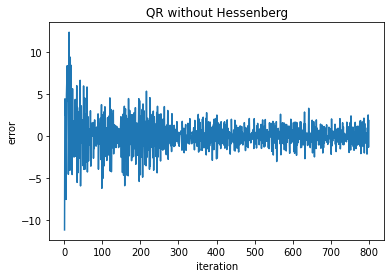

[-4.34238028 -2.58465621 -2.39144524 -2.29715174 -1.86479528 -1.16734231
 -1.0130878  -0.97492129 -0.35077932  0.58986567  0.59216133  1.32370172
  1.38424122  2.07167834  2.98571819  3.31711821]


第幾個iter收斂:
617
花費時間:4.786718845367432


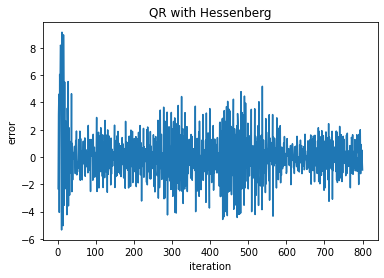

[-4.34238028 -2.42528698 -2.34980776 -2.33878923 -1.86260902 -1.22174046
 -1.13429051 -0.95868965  0.06387392  0.71604896  0.90904847  1.25587167
  1.32036464  1.34347503  2.75937699  3.54345942]

使用np.linalg.eig計算出來的eigenvalue:
[-4.34238028+0.j         -2.34429849-0.29286043j -2.34429849+0.29286043j
 -1.8648029 +0.j         -1.77978875-2.09371282j -1.77978875+2.09371282j
 -1.09021505-2.8666373j  -1.09021505+2.8666373j   0.4864612 -3.43326461j
  0.4864612 +3.43326461j  0.98705726-1.54635043j  0.98705726+1.54635043j
  1.33191983-0.66674387j  1.33191983+0.66674387j  3.1514182 -1.9358957j
  3.1514182 +1.9358957j ]
####################################################################################3


In [14]:
for n in range(2,5):
    QRcompare(n)

## 觀測花費的時間 與錯誤
因為不是每次情況都一定 多取幾次觀測平均清況
使用qr固定迭代300次求eigenvalue

- 第一個圖為計算 n*n 矩陣eigenvalue所需執行時間比較
- 第一個圖為計算使用QR算arnoldi_iteration(A) 跟A n*n 矩陣的eigenvalue 與 np.linalg.eig(A)誤差比較(誤差使用Root Mean square error)

In [15]:
def RMSE(y, y_pred):
 
        mse = np.mean((y - y_pred)**2) 
   
        return np.sqrt(mse)

In [16]:
def plottime(iter=8):
    alltime=[]
    alltime2=[]
    allerror=[]
    allerror2=[]
    for n in range(2,iter):    
        N = 2*n
        A,b=lstA(N)
        timelist=[]
        timelist2=[]
        errorlist=[]
        errorlist2=[]
        print("\n###矩陣大小"+str(N)+"的方形矩陣###\n")
        for i in range(5):  #因為不是每次情況都一定 取五次觀測平均清況
            mtx=A
            eig,___=np.linalg.eig(A)
            eig=np.sort(eig)
            t0=time()
            time1=qr(mtx, 800, callback = monitor_error,isprint=False)
            timelist.append(time1-t0)
            clear_history()
            e1=np.sort(np.diag(mtx))
            errorlist.append(RMSE(eig,e1))
            t0=time()
            ___ , H , k =arnoldi_iteration(A, n=150)
            mtx=H[:k+1,:k+1]
            time2=qr(mtx, 800, callback = monitor_error,isprint=False)
            timelist2.append(time2-t0)
            clear_history()
            e2=np.sort(np.diag(mtx))
            errorlist2.append(RMSE(eig,e2))
        alltime.append(np.mean(np.array(timelist)))
        alltime2.append(np.mean(np.array(timelist2)))
        allerror.append(np.mean(np.array(errorlist)))
        allerror2.append(np.mean(np.array(errorlist2)))
    
    return alltime,alltime2,allerror,allerror2


###矩陣大小4的方形矩陣###


###矩陣大小6的方形矩陣###


###矩陣大小8的方形矩陣###


###矩陣大小10的方形矩陣###


###矩陣大小12的方形矩陣###


###矩陣大小14的方形矩陣###


###矩陣大小16的方形矩陣###



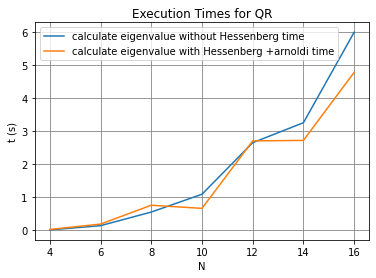

D:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


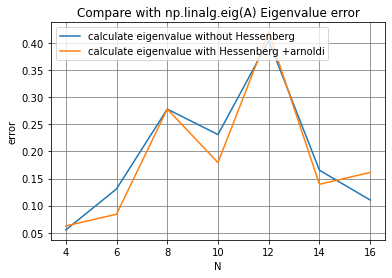

In [17]:
iter=9

alltime,alltime2,allerror,allerror2=plottime(iter)   
fig, ax = plt.subplots()
nran=np.array(range(2,iter))
alltime=np.array(alltime)
alltime2=np.array(alltime2)
ax.plot(2*nran, alltime ,label='calculate eigenvalue without Hessenberg time')
ax.plot(2*nran ,alltime2 ,label='calculate eigenvalue with Hessenberg +arnoldi time')
ax.legend(loc=2)
ax.set_xlabel('N')
ax.set_ylabel('t (s)')
ax.set_title('Execution Times for QR')
ax.grid(color='gray')

plt.show()


#################3
fig2, ax2 = plt.subplots()
alltime=np.array(allerror)
alltime2=np.array(allerror2)
ax2.plot(2*nran, alltime ,label='calculate eigenvalue without Hessenberg')
ax2.plot(2*nran ,alltime2 ,label='calculate eigenvalue with Hessenberg +arnoldi')
ax2.legend(loc=2)
ax2.set_xlabel('N')
ax2.set_ylabel('error')
ax2.set_title('Compare with np.linalg.eig(A) Eigenvalue error')
ax2.grid(color='gray')

plt.show()

# GMRES

使用Krylov演算法 得到的結果可以看出效果似乎不是那麼好，所以GMRES並不是直接使用Krylov, 而是使用Arnoldi 迭代法
我們將找到一個 orthonormal basis for $𝐾_𝑚 {𝒒_𝟏,𝒒_𝟐,…,𝒒_𝒎}$

columns of the matrix  𝑄_𝑛 我們會用 Arnoldi iteration 得到。
持續迭代求:
$$min⁡〖‖((𝐻_𝑚 ) ̅𝑦−‖𝑏‖ 𝑒_1 )‖_2 〗\tag{2-1}$$
並且已知$‖𝑟_𝑚 ‖$ is minimized over $𝐾_𝑚$
$$‖𝑟_𝑚 ‖/‖𝑏‖ <𝑡𝑜𝑙("tolerance")\tag{2-2}$$
我們將使用上面這個不等式作為結束迭代的標準

最後界果我們的 approximate solution $𝐱_𝒎∈𝐾_𝑚$ 又可以被寫作 $𝐱_𝒎=𝑄_𝑚 𝐲$


以下為我們演算法
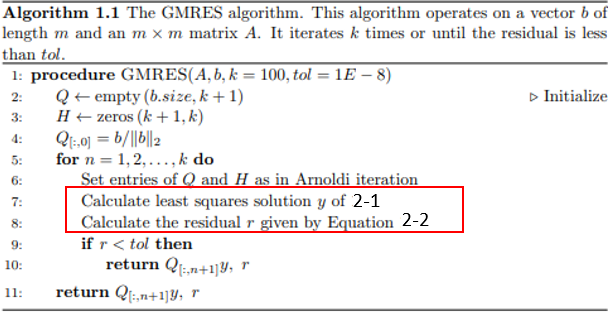
<u>詳細內容可以參考 **lec16** P15~P21</u>

reference:http://www.acme.byu.edu/wp-content/uploads/2014/09/Krylov2.pdf

現在的GMRES基本都會需要一個initial 的x0 幫助得到更好的結果所以這邊的b 是我已經處理好的 **b直接拿來照上面演算法用即可**

In [18]:
def GMRES(A, b, n: int,tol = 1e-16):
    """Computes a basis of the (n + 1)-Krylov subspace of A: the space
    spanned by {b, Ab, ..., A^n b}.

    Arguments
      A: m × m array
      b: initial vector (length m)
      n: dimension of Krylov subspace, must be >= 1
    
    Returns
      Q: m x (n + 1) array, the columns are an orthonormal basis of the
        Krylov subspace.
      h: (n + 1) x n array, A on basis Q. It is upper Hessenberg.  
    """
    flag="未收斂"
    x0=np.ones(A.shape[0])
    x=[]
    b = b - np.asarray(np.dot(A, x0)).reshape(-1)
    
    m = A.shape[0]
    h = np.zeros((n + 1, n))
    Q = np.zeros((m, n + 1))
    q = b / np.linalg.norm(b)  # Normalize the input vector
    Q[:, 0] = q  # Use it as the first Krylov vector

    for k in range(n):
        v = A.dot(q)                #請填這裡 與Arnoldi iteration 綠色框相同
        for j in range(k + 1):  # Subtract the projections on previous vectors
            h[j, k] = np.dot(Q[:,j],v)      #請填這裡 與Arnoldi iteration 藍色框相同
            v = v-h[j,k]*Q[:,j]            #請填這裡 與Arnoldi iteration 藍色框相同

        h[k + 1, k] = np.linalg.norm(v)
        if h[k + 1, k] > tol:  # Add the produced vector to the list, unless
            q = v/h[k+1,k]            #請填這裡 與Arnoldi iteration 紅色框相同
            Q[:, k + 1] = q
#         else:  # If that happens, stop iterating.
#              return x[k-1],res
            
        ################################# GMRES
        result= get_y(h,b,n)             # 2-1
        x.append(np.dot(Q[:,:n], result) + x0)
        
        #################################
        e1 = [0]*(n+1)
        e1[0]=1
        b_norm = np.linalg.norm(b)
        #result = np.append(result,np.ones(1),axis=0)
        res = np.linalg.norm(h.dot(result) - np.dot(b_norm,e1)) / b_norm                          #請填這裡 2-2
        ################################
        if res <tol :
            flag="在"+str(k)+"時收斂"
            return x[k],res,flag
            break

    return x[k],res,flag

In [19]:
def get_y(h,b,n):             #請填這裡 2-2 
    
    ############請寫下你的程式碼########
    e1 = [0]*(n+1)
    e1[0]=1
    b_norm = np.linalg.norm(b)
    negated_b_norm = np.negative(b_norm)
    negated_b_times_e1 = np.dot(negated_b_norm,e1)
    result, residuals, _, _ = np.linalg.lstsq(h*-1, negated_b_times_e1, rcond=-1)
    return result

## 檢查你的答案
- 出來的結果必須與np.linalg..lstsq(A)相同

In [20]:
A_mat=np.array([[1,3,4,2],[2,5,6,3],[3,1,2,5],[4,1,5,2]])
b_mat = np.array([3, 2,6,1])


nmax_iter = 100

x = GMRES(A_mat, b_mat, nmax_iter)
print("GMRSE:")
print(x)
print("np.linalg.lstsq:")
x,res,__,__=np.linalg.lstsq(A_mat, b_mat)
print(x,res)


GMRSE:
(array([-2.22378059, -0.1328113 ,  0.0612016 ,  0.11809915]), 2.3139392699008414e-15, '未收斂')
np.linalg.lstsq:
[-2.76595745 -2.23404255  1.82978723  2.57446809] []


<ipython-input-20-bf6f5b4ee83b>:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x,res,__,__=np.linalg.lstsq(A_mat, b_mat)


In [21]:
def testGMRES(A_mat,b_mat,n):
    
    x = GMRES(A_mat, b_mat,100,tol=1e-16)
    x2=spla.gmres(A_mat,b_mat)
    x3=np.linalg.lstsq(A_mat,b_mat)[0]

    print("我們的GMRES solution:")
    print(x)
    print("\n")
    print("np.linalg.lstsq的 solution:")

    print(x3)
    print("\n")

In [22]:
A_mat,b_mat=lstA(10)
testGMRES(A_mat,b_mat,10)

我們的GMRES solution:
(array([ 20.82165672,  67.43318539,  59.52268009,  87.94170284,
        35.15559078,  97.9548488 , -21.39108278,  77.69338738,
        80.07566501,  28.04472407]), 1.3245130222316774e-14, '未收斂')


np.linalg.lstsq的 solution:
[79.17845849 51.25738169 78.39186664 78.68957938 68.88544913 79.10981444
 -8.04766937 71.90092297 84.87819772 58.32953624]




<ipython-input-21-53514af7e077>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x3=np.linalg.lstsq(A_mat,b_mat)[0]


## integer Number matrix
這邊我們將隨機產生A,b  $𝐴∈N^{𝑛×𝑛}$ , $𝒃∈N^𝑛 且n\in\{2,3,...7\}$
並使用剛設計的GMRES演算法得到近似解 

In [23]:
for i in range(2,7):
    n=2**i
    print("\n###矩陣大小"+str(n)+"的方形矩陣###\n")
    A_mat=np.random.randint(5, size=(n,n))
    b_mat=np.random.randint(5, size=n)
    testGMRES(A_mat,b_mat,n)


###矩陣大小4的方形矩陣###

我們的GMRES solution:
(array([0.11231803, 0.14280181, 1.16911125, 0.74250097]), 8.962801575561427e-17, '在12時收斂')


np.linalg.lstsq的 solution:
[ 0.34 -0.56  0.4   0.4 ]



###矩陣大小8的方形矩陣###



<ipython-input-21-53514af7e077>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x3=np.linalg.lstsq(A_mat,b_mat)[0]


我們的GMRES solution:
(array([-0.03280462,  0.34329898,  0.55873117, -0.10487466, -0.21990596,
       -1.19748148,  0.15442319,  1.25298282]), 1.636728623879699e-15, '未收斂')


np.linalg.lstsq的 solution:
[ 0.90404355  1.76399689 -0.26088647 -0.02900467  0.58157076 -2.33211509
 -0.37721617  0.47371695]



###矩陣大小16的方形矩陣###

我們的GMRES solution:
(array([-0.35216714,  0.70074267, -0.80616082, -0.30470187, -0.95846326,
        0.71487186,  0.38312522,  1.52511969,  0.35284895,  1.00382054,
        1.06065878, -0.68359261, -0.87015916, -0.14589407,  0.96254198,
       -0.58745694]), 7.455501161297155e-17, '在34時收斂')


np.linalg.lstsq的 solution:
[-0.14649162  0.39723484 -0.53811351 -0.33866274 -1.14711926  0.76330598
 -0.0685365   1.54067836  0.27021431  0.92392821  1.34109495 -0.93002257
 -0.79783457  0.06454636  1.20787622 -0.64382268]



###矩陣大小32的方形矩陣###

我們的GMRES solution:
(array([-1.43397232,  2.52752644,  1.94916599, -0.02297913,  0.12106899,
        2.8414236 ,  2.1503291 ,  1.59346093, -0.7

## Real Number Matrix
這邊我們將隨機產生A,b  $𝐴∈R^{𝑛×𝑛}$ , $𝒃∈R^𝑛 且n\in\{2,3,...7\}$
並使用剛設計的GMRES演算法得到近似解 

In [24]:
for i in range(2,7):
    n=2**i
    print("\n###矩陣大小"+str(n)+"的方形矩陣###\n")
    A_mat,b_mat=lstA(n)
    testGMRES(A_mat,b_mat,n)


###矩陣大小4的方形矩陣###

我們的GMRES solution:
(array([50.05078174, 26.46005591,  9.08441306, 63.72971528]), 1.1454322200264741e-14, '未收斂')


np.linalg.lstsq的 solution:
[67.76488547 67.79296461 62.22672425 28.30150782]



###矩陣大小8的方形矩陣###

我們的GMRES solution:
(array([ 61.10415565, 109.4960201 ,  18.77531849,  44.66005974,
        77.65493659,   8.70070439,  75.69695727,  31.77150777]), 5.698863579710028e-15, '未收斂')


np.linalg.lstsq的 solution:
[ 61.09927313 110.82865506  26.3575206   42.0642652   70.95165774
  14.71309618  77.24266503  37.96760479]



###矩陣大小16的方形矩陣###



<ipython-input-21-53514af7e077>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x3=np.linalg.lstsq(A_mat,b_mat)[0]


我們的GMRES solution:
(array([ 306.60814716,  256.53521428,  126.34273779,   23.56511382,
        -76.62104162,   -7.74546141, -253.95866998,  140.15914834,
         44.01394238,  -77.87677908,  -84.69688241,  108.97326348,
       -156.60582355,   81.20309363, -386.53160567,  586.65598028]), 2.58698825220138e-14, '未收斂')


np.linalg.lstsq的 solution:
[ 375.78146196  356.44239855 -108.2189517  -144.40061155 -163.80209412
 -106.42787409 -350.24352352   68.40034772   90.7667229    40.14507276
 -125.72835392  149.88777541  -73.01278587   59.33236826 -251.33326535
  648.46241137]



###矩陣大小32的方形矩陣###

我們的GMRES solution:
(array([-14.2628235 ,  57.44945505, -23.00051849,  20.39551655,
        76.27763051, -59.36346465, -59.44086008,   9.03771259,
       -45.54418242,   4.75781698, -45.27914816, -17.9089013 ,
       -12.93929021,  45.53748389,  32.3219935 , -31.4026315 ,
       126.7695563 ,  17.50962702, -35.3228022 , -25.51817311,
        51.08303864, -35.09476444,  38.63254823,  -5.52335672,
   

# 計算使用GMRSE without arnoldi_iteration跟with arnoldi_iteration n*n 矩陣的 least square problem 解 
# 與 np.linalg.lstsq誤差比較(誤差使用Root Mean square error) 

In [25]:
def plotKeyerrorInt(iter=8):
    flag=[]
    flag2=[]
    alltime=[]
    alltime2=[]
    allerror=[]
    allerror2=[]
    for n in range(2,iter):    
        N = 2** n
        A_mat=np.random.randint(5, size=(n,n))
        b_mat=np.random.randint(5, size=n)
        errorlist=[]
        errorlist2=[]
        print("\n###矩陣大小"+str(n)+"的方形矩陣###\n")
        for i in range(5):  #因為不是每次情況都一定 取五次觀測平均清況
            x3=np.linalg.lstsq(A_mat,b_mat)[0]
            x,__,f0=Krylov(A_mat,b_mat,100,tol=1e-16)
            errorlist.append(RMSE(x3,x))
            if((f0=="未收斂")):
                flag.append(n)
            
            x2,__,f1=GMRES(A_mat, b_mat,100,tol=1e-16)
            errorlist2.append(RMSE(x3,x2))
            if((f1=="未收斂")):
                flag2.append(n)
                
        
        allerror.append(np.mean(np.array(errorlist)))
        allerror2.append(np.mean(np.array(errorlist2)))
    
    return allerror,allerror2,flag,flag2

In [26]:
def plotKeyerrorNatu(iter=8):
    flag= [] 
    flag2=[]
    alltime=[]
    alltime2=[]
    allerror=[]
    allerror2=[]
    for n in range(2,iter):    
        N = 2** n
        A_mat,b_mat=lstA(N)
        errorlist=[]
        errorlist2=[]
        print("\n###矩陣大小"+str(n)+"的方形矩陣###\n")
        for i in range(5):  #因為不是每次情況都一定 取五次觀測平均清況
            x3=np.linalg.lstsq(A_mat,b_mat)[0]
            x,__,f0=Krylov(A_mat,b_mat,100,tol=1e-16)
            errorlist.append(RMSE(x3,x))
            if((f0=="未收斂")):
                flag.append(n)
            
            x2,__, f1 =GMRES(A_mat, b_mat,100,tol=1e-16)
            errorlist2.append(RMSE(x3,x2))
            if((f1=="未收斂")):
                flag2.append(n)
               
        
        allerror.append(np.mean(np.array(errorlist)))
        allerror2.append(np.mean(np.array(errorlist2)))
    
    return allerror,allerror2 ,flag ,flag2

### 這邊 我們的GMRES without Arnoldi 跟 with Arnoldi 都固定最多只做100次 迭代
#### integer Matrix


###矩陣大小2的方形矩陣###



<ipython-input-25-27f6b0ead442>:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x3=np.linalg.lstsq(A_mat,b_mat)[0]
<ipython-input-3-04db00ac8a7c>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result,Error,RankX,Singularvalues=np.linalg.lstsq(AK, b)



###矩陣大小3的方形矩陣###


###矩陣大小4的方形矩陣###


###矩陣大小5的方形矩陣###


###矩陣大小6的方形矩陣###


###矩陣大小7的方形矩陣###


###矩陣大小8的方形矩陣###


###矩陣大小9的方形矩陣###



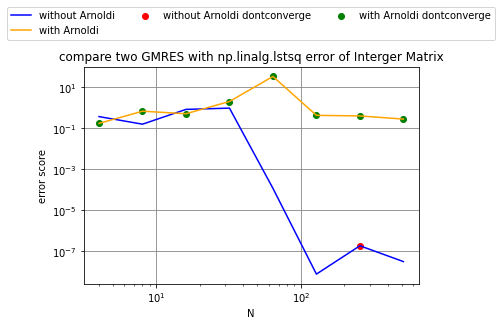

In [27]:
iter=10

allerror,allerror2 ,flag,flag2 = plotKeyerrorInt(iter)   
fig, ax = plt.subplots(subplot_kw=dict(xscale='log', yscale='log'))
nran=np.array(range(2,iter))
allerror=np.array(allerror)
allerror2=np.array(allerror2)
flag=np.array(flag)
flag=np.unique(flag)
flag2=np.array(flag2)
flag2=np.unique(flag2)

ax.plot(2**nran, allerror ,label='without Arnoldi',color='blue')
ax.plot(2**nran ,allerror2 ,label='with Arnoldi',color='orange')
if(flag.size>0): #顯示 withount Arnoldi 沒有converge 的點
    ax.scatter(2**flag,allerror[flag-2],label='without Arnoldi dontconverge',color='red')#因為是從2開始所以 要比原本index 比flag值少2
    
if(flag2.size>0):#顯示 Arnoldi 沒有converge 的點
    ax.scatter(2**flag2,allerror2[flag2-2],label='with Arnoldi dontconverge',color='green')#因為是從2開始所以 要比原本index 比flag值少2




ax.legend(loc='center', bbox_to_anchor=(0.5, 1.2),ncol=3)
ax.set_xlabel('N')
ax.set_ylabel('error score')
ax.set_title('compare two GMRES with np.linalg.lstsq error of Interger Matrix')
ax.grid(color='gray')


plt.show()

#### Real Number Matrix


###矩陣大小2的方形矩陣###



D:\anaconda\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app
D:\anaconda\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



###矩陣大小3的方形矩陣###


###矩陣大小4的方形矩陣###


###矩陣大小5的方形矩陣###


###矩陣大小6的方形矩陣###


###矩陣大小7的方形矩陣###


###矩陣大小8的方形矩陣###


###矩陣大小9的方形矩陣###



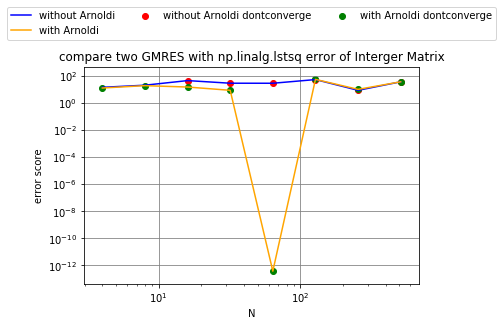

In [117]:
iter=10

allerror,allerror2, flag ,flag2 = plotKeyerrorNatu(iter)   
fig, ax = plt.subplots(subplot_kw=dict(xscale='log', yscale='log'))
nran=np.array(range(2,iter))
allerror=np.array(allerror)
allerror2=np.array(allerror2)
flag=np.array(flag)
flag=np.unique(flag)
flag2=np.array(flag2)
flag2=np.unique(flag2)

ax.plot(2**nran, allerror ,label='without Arnoldi',color='blue')
ax.plot(2**nran ,allerror2 ,label='with Arnoldi',color='orange')
if(flag.size>0): #顯示 withount Arnoldi 沒有converge 的點
    ax.scatter(2**flag,allerror[flag-2],label='without Arnoldi dontconverge',color='red')#因為是從2開始所以 要比原本index 比flag值少2
    
if(flag2.size>0):#顯示 Arnoldi 沒有converge 的點
    ax.scatter(2**flag2,allerror2[flag2-2],label='with Arnoldi dontconverge',color='green')#因為是從2開始所以 要比原本index 比flag值少2




ax.legend(loc='center', bbox_to_anchor=(0.5, 1.2),ncol=3)
ax.set_xlabel('N')
ax.set_ylabel('error score')
ax.set_title('compare two GMRES with np.linalg.lstsq error of Interger Matrix')
ax.grid(color='gray')


plt.show()